In [469]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [470]:
!pip install pyforest

In [471]:
from pyforest import *
lazy_imports()

['from sklearn.model_selection import StratifiedKFold',
 'from openpyxl import load_workbook',
 'import dash',
 'import pydot',
 'from sklearn.linear_model import LogisticRegression',
 'import plotly.graph_objs as go',
 'from sklearn import svm',
 'from sklearn.linear_model import ElasticNet',
 'from scipy import signal as sg',
 'import nltk',
 'import textblob',
 'import plotly as py',
 'import sklearn',
 'import plotly.express as px',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import gensim',
 'import altair as alt',
 'import fbprophet',
 'import cv2',
 'from sklearn.preprocessing import MinMaxScaler',
 'import bokeh',
 'from statsmodels.tsa.arima_model import ARIMA',
 'import skimage',
 'from pyspark import SparkContext',
 'from xlrd import open_workbook',
 'from sklearn.preprocessing import StandardScaler',
 'from sklearn.preprocessing import OneHotEncoder',
 'import xgboost as xgb',
 'import statistics',
 'from scipy import stats',
 'import matplotlib as mpl

# 1. Modelling for UCS

In [472]:
df=pd.read_excel("data/python modelling.xlsx",sheet_name="%Wt Loss")

<IPython.core.display.Javascript object>

In [473]:
df

,weight loss (Y),X1-MOLARITY,X3- % FLY ASH,X4- % GGBS
0,8.130000,1,80,20
1,7.020000,1,80,20
2,7.420000,1,80,20
3,8.420000,1,80,20
4,6.470000,2,80,20
...,...,...,...,...
59,5.350000,3,50,50
60,5.800000,4,50,50
61,4.840000,4,50,50
62,5.268340,4,50,50


Y is the target, X_i denote features

In [474]:
y=np.array(df["weight loss (Y)"])

<IPython.core.display.Javascript object>

In [475]:
y

array([8.13    , 7.02    , 7.42    , 8.42    , 6.47    , 8.14    ,
       7.16    , 7.42    , 5.24    , 5.69    , 6.11    , 6.47    ,
       4.82    , 4.26    , 5.27    , 5.84    , 5.9211  , 6.99825 ,
       6.24    , 7.20465 , 6.0928  , 5.22    , 6.33    , 5.54    ,
       4.45    , 3.84    , 5.23    , 5.75    , 3.3554  , 4.1515  ,
       4.62    , 2.94    , 6.54    , 6.01    , 7.04    , 7.35    ,
       5.9     , 5.32    , 6.34    , 6.65    , 5.22    , 5.02    ,
       6.11    , 6.51    , 3.72    , 4.22    , 4.67    , 5.02    ,
       8.24    , 7.2693  , 8.74    , 7.64    , 6.8     , 7.84    ,
       6.35    , 7.25    , 6.24    , 5.6672  , 6.74    , 5.35    ,
       5.8     , 4.84    , 5.26834 , 4.409966])

In [476]:
df.head()

,weight loss (Y),X1-MOLARITY,X3- % FLY ASH,X4- % GGBS
0,8.13,1,80,20
1,7.02,1,80,20
2,7.42,1,80,20
3,8.42,1,80,20
4,6.47,2,80,20


In [477]:
df = df.rename(columns={'X1-MOLARITY':'MOLARITY',
                        'X3- % FLY ASH':'FLY ASH',
                        'X4- % GGBS':'GGBS',
                        'weight loss (Y)':'WTLOSS'
})

In [478]:
df.head()

,WTLOSS,MOLARITY,FLY ASH,GGBS
0,8.13,1,80,20
1,7.02,1,80,20
2,7.42,1,80,20
3,8.42,1,80,20
4,6.47,2,80,20


In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   WTLOSS    64 non-null     float64
 1   MOLARITY  64 non-null     int64  
 2   FLY ASH   64 non-null     int64  
 3   GGBS      64 non-null     int64  
dtypes: float64(1), int64(3)
memory usage: 2.1 KB


In [480]:
df.shape

(64, 4)

In [481]:
df.isnull().sum()

WTLOSS      0
MOLARITY    0
FLY ASH     0
GGBS        0
dtype: int64

no null entries

In [482]:
df.describe()

,WTLOSS,MOLARITY,FLY ASH,GGBS
count,64.000000,64.000000,64.000000,64.000000
mean,5.997633,2.500000,65.000000,35.000000
std,1.294778,1.126872,11.268723,11.268723
min,2.940000,1.000000,50.000000,20.000000
25%,5.220000,1.750000,57.500000,27.500000
50%,6.051400,2.500000,65.000000,35.000000
75%,7.003687,3.250000,72.500000,42.500000
max,8.740000,4.000000,80.000000,50.000000


## Exploratory Data Analysis 

## Molarity

In [483]:
#Quartiles to check for outliers
from scipy import stats

Q1=df['MOLARITY'].quantile(q=0.25)
Q3=df['MOLARITY'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['MOLARITY']))

1st Quartile (Q1) is:  1.75
3rd Quartile (Q3) is:  3.25
Interquartile range (IQR) is  1.5


<IPython.core.display.Javascript object>

{'whiskers': [<matplotlib.lines.Line2D at 0x2394b039960>,
 'caps': [<matplotlib.lines.Line2D at 0x2394b039db0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2394b039ea0>],
 'medians': [<matplotlib.lines.Line2D at 0x2394b0386d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2394b03a230>],
 'means': []}

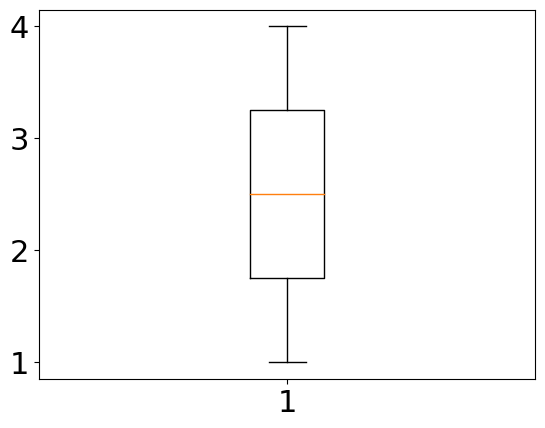

In [484]:
plt.boxplot(df["MOLARITY"])

In [485]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -0.5
Upper outlier limit in cement:  5.5


In [486]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in Molarity upper: ', df[df['MOLARITY']>6.0]['MOLARITY'].count())
print('Number of outliers in Molarity lower: ', df[df['MOLARITY']<-2.0]['MOLARITY'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in Molarity upper:  0
Number of outliers in Molarity lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_10884\1542525641.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY']).set_title('MOLARITY')


<IPython.core.display.Javascript object>

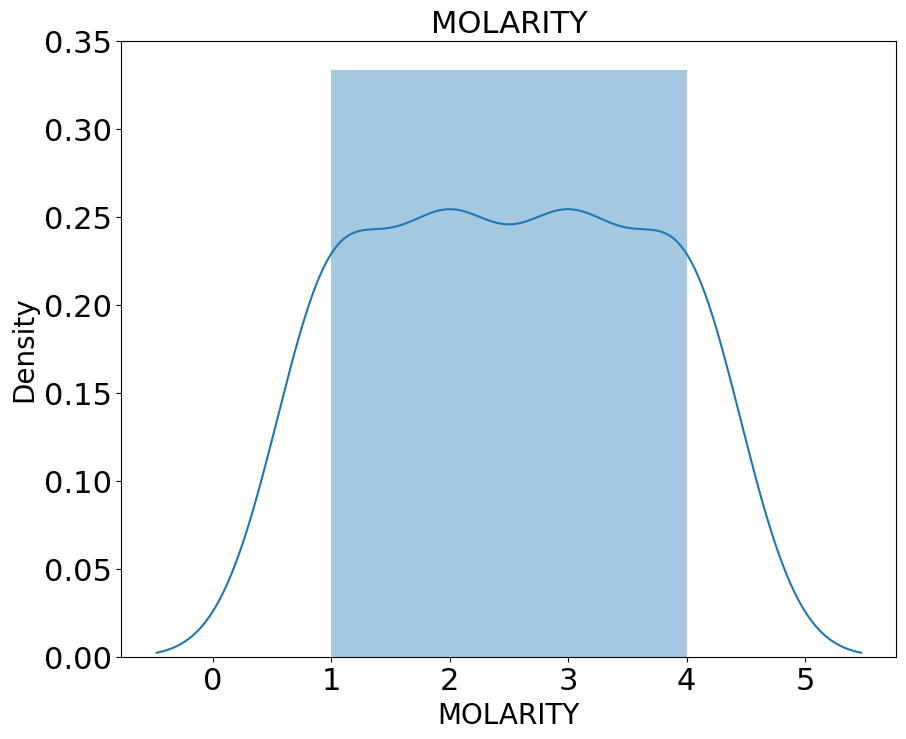

In [487]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY']).set_title('MOLARITY')
plt.show()

<IPython.core.display.Javascript object>

<Axes: >

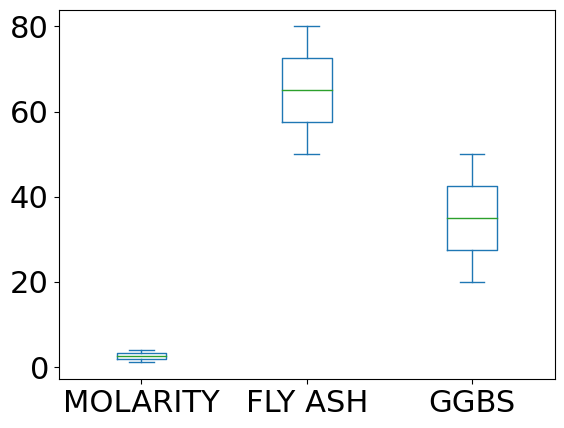

In [488]:
df1=pd.DataFrame(df,columns=["MOLARITY","FLY ASH","GGBS"])
df1.plot(kind="box")

Thus we see no outliers exist in the data

# Checking Data Distribution 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_10884\173142493.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MOLARITY'])


<IPython.core.display.Javascript object>

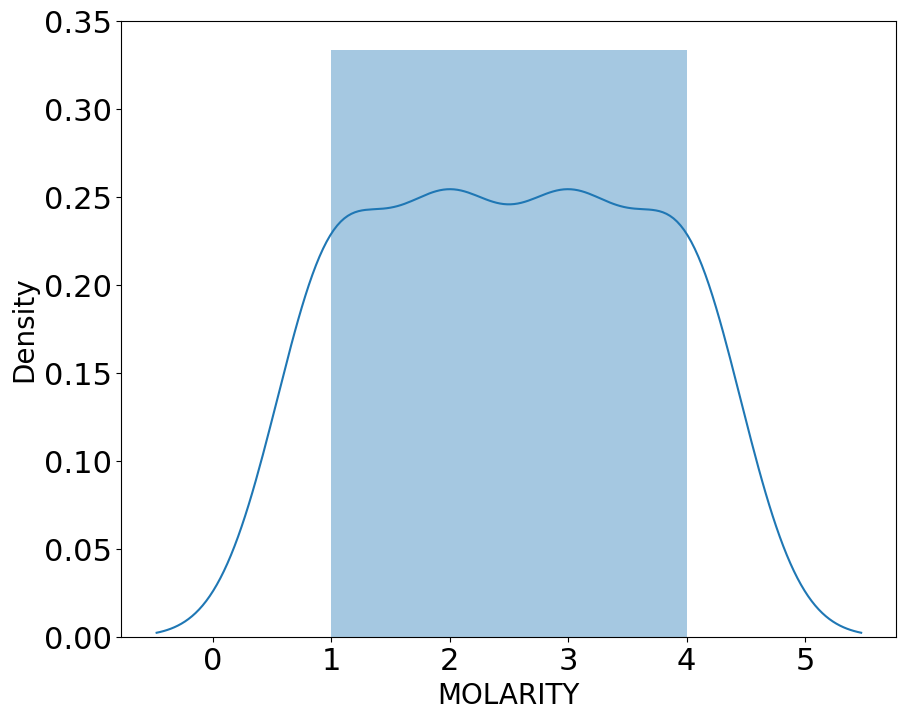

In [489]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['MOLARITY'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_10884\2056115471.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['FLY ASH'])


<IPython.core.display.Javascript object>

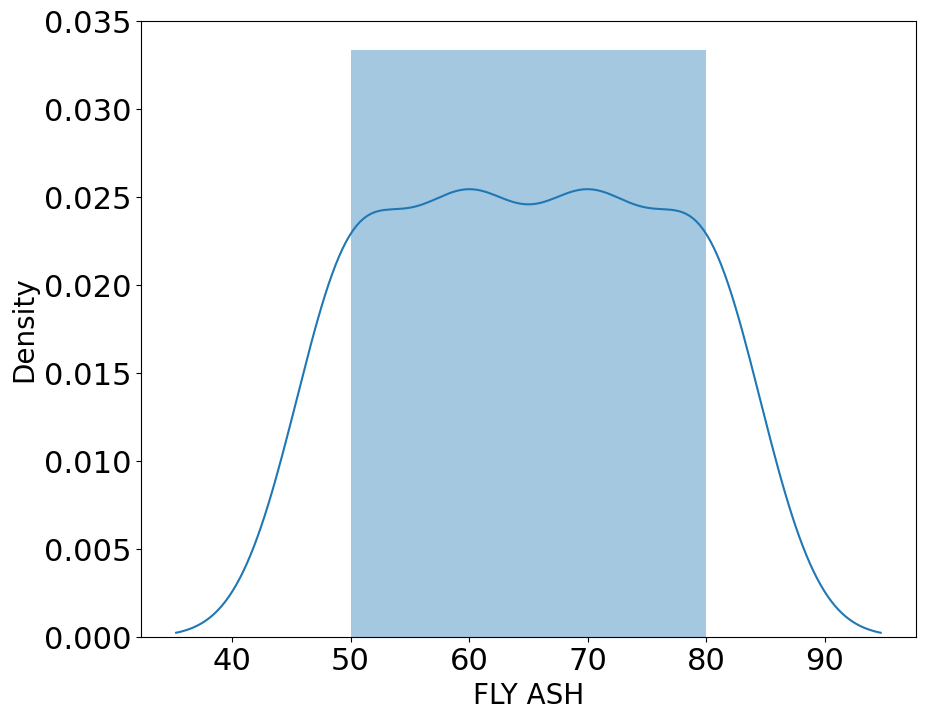

In [490]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['FLY ASH'])
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\manav\AppData\Local\Temp\ipykernel_10884\1052900917.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GGBS'])


<IPython.core.display.Javascript object>

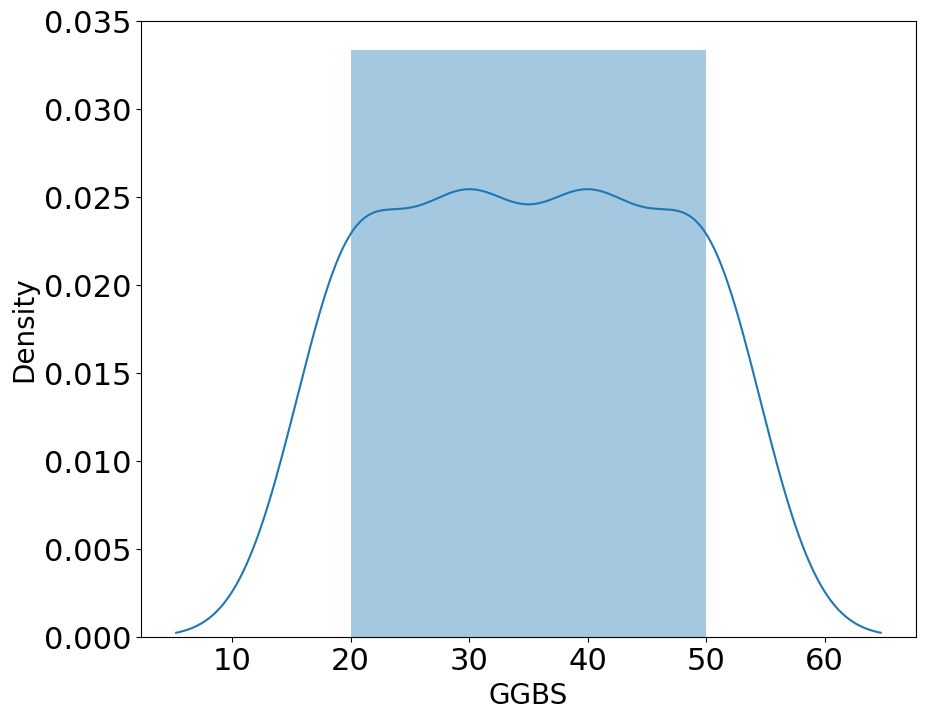

In [491]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['GGBS'])
plt.show()

<IPython.core.display.Javascript object>

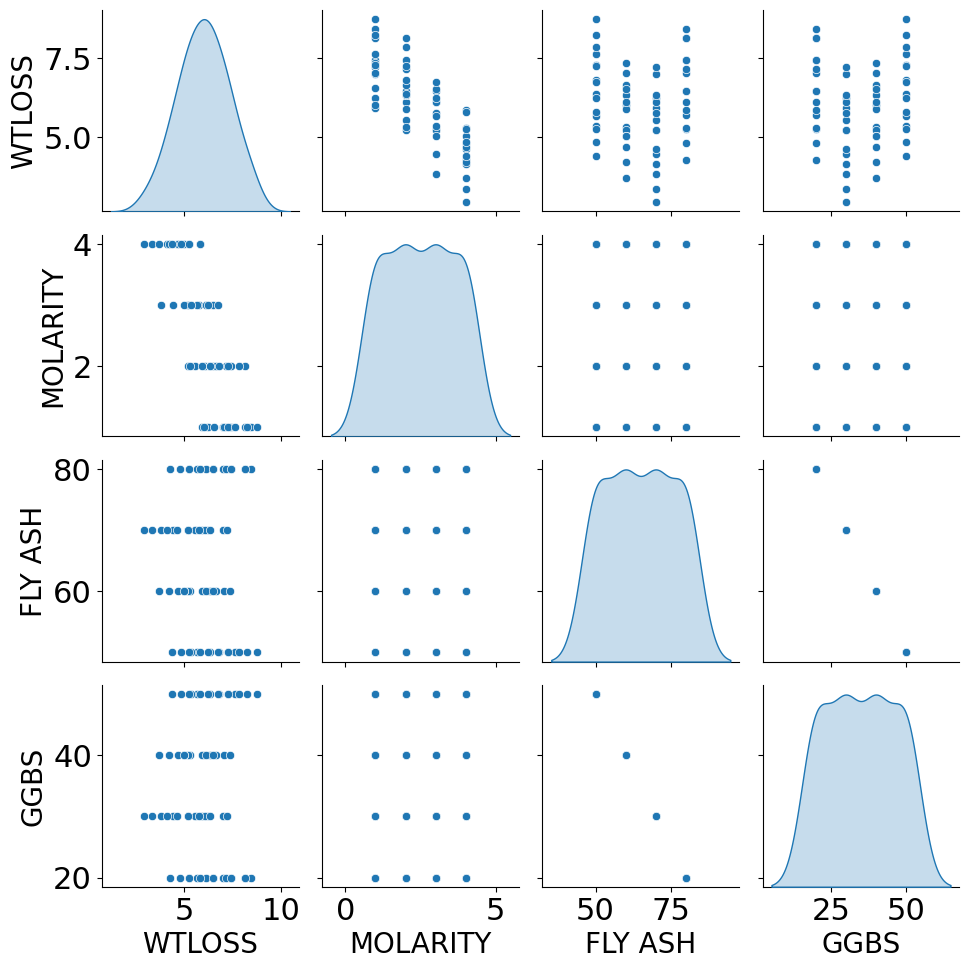

In [492]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df, diag_kind='kde')

<IPython.core.display.Javascript object>

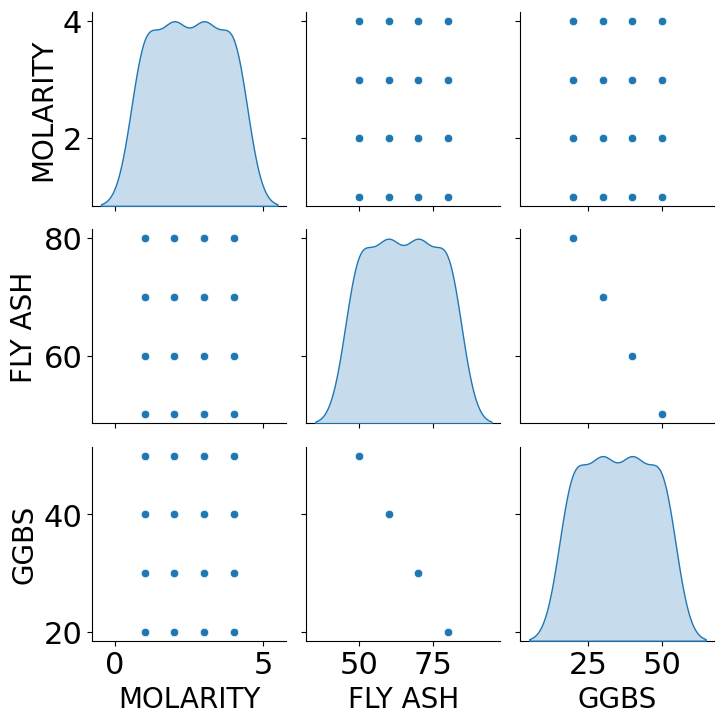

In [493]:
# pairplot.
#plot density curve instead of histogram in the diagonals

sns.pairplot(df1, diag_kind='kde')

There seems to be a linear relationship between GGBS and FLY ASH while other parameters are independent of each other. Also the parameters seem to assume particular values only rather than being randomly scattered

## Correlation between variables 

In [494]:
sns.set_context("poster",font_scale=.7)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

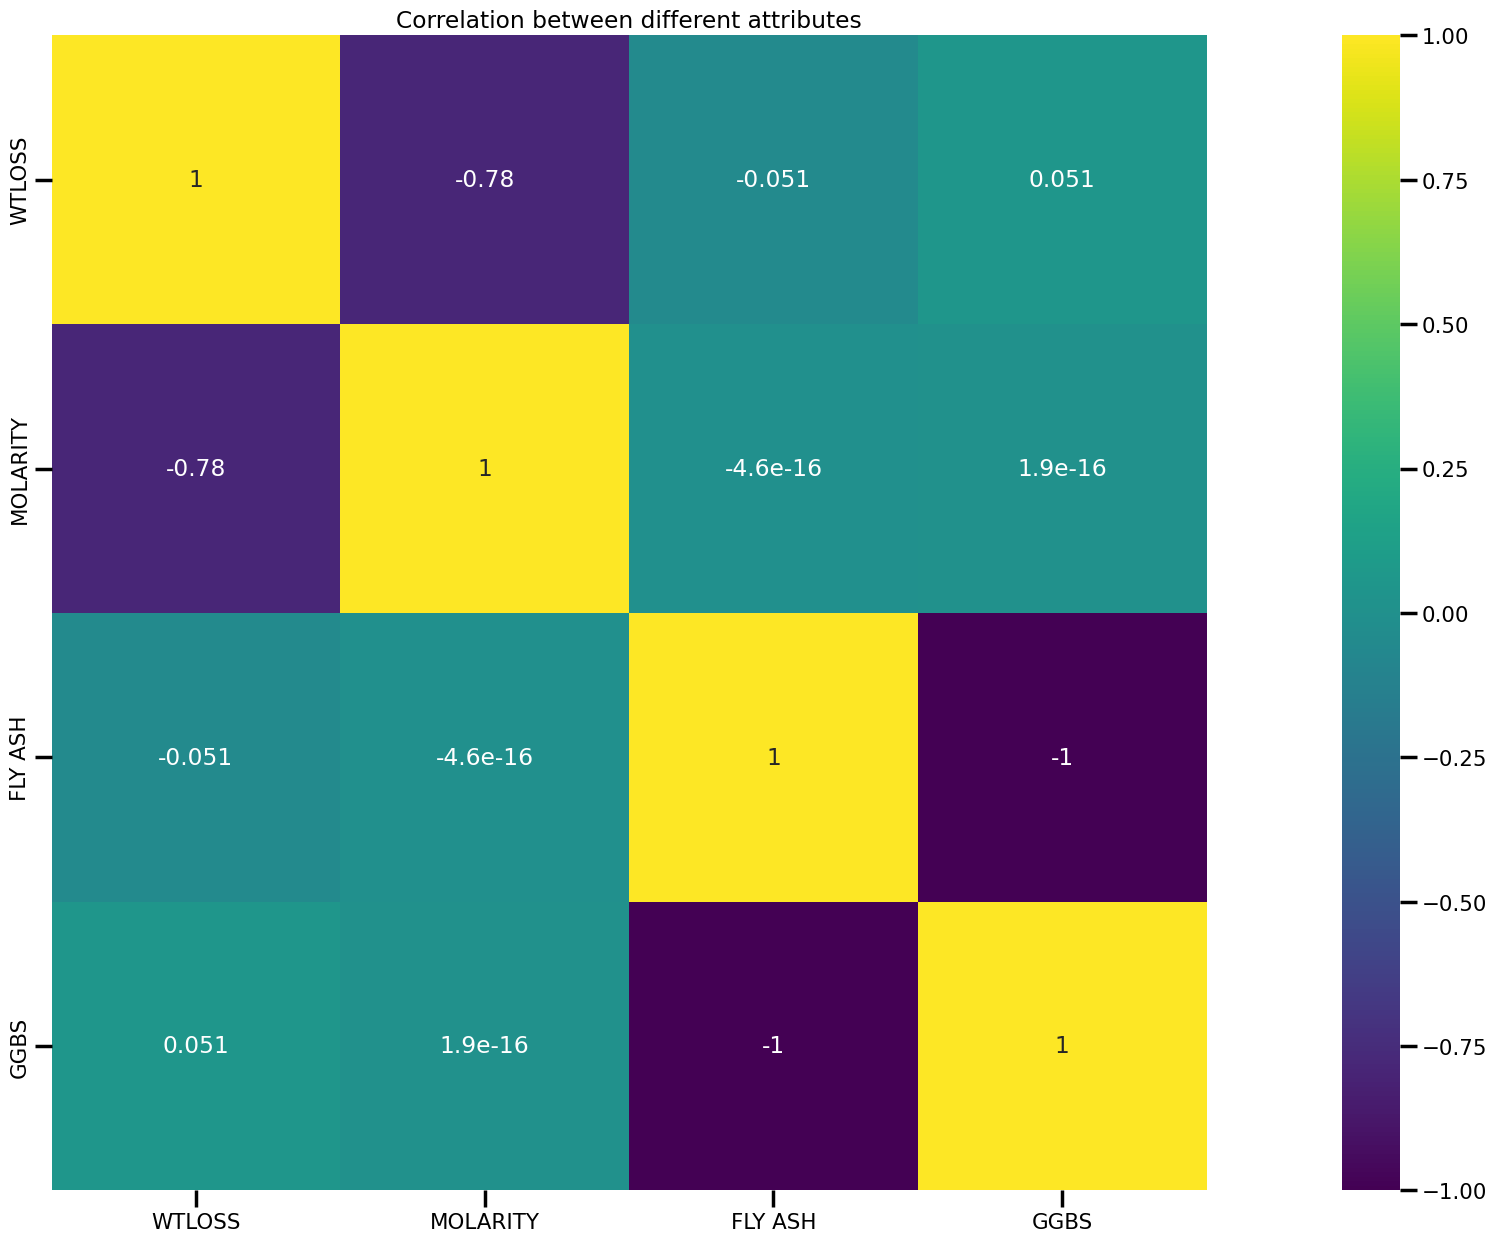

In [495]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

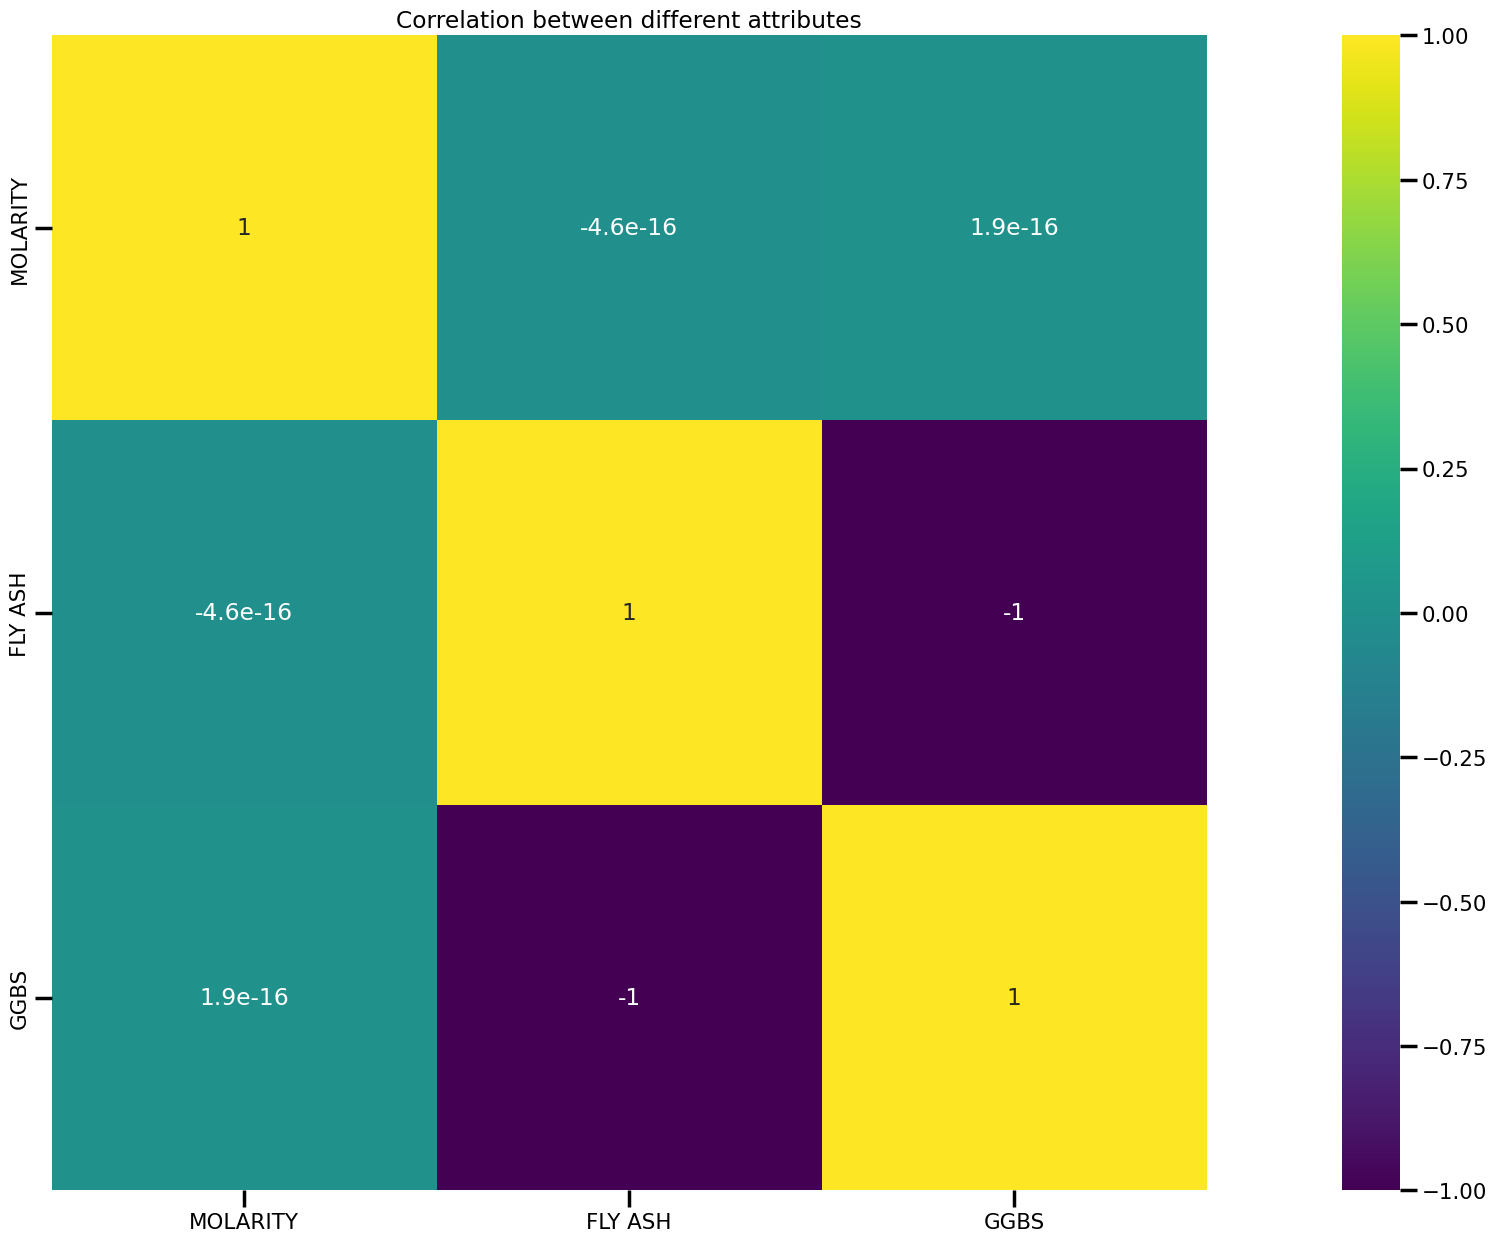

In [496]:
plt.figure(figsize=(35,15))

sns.heatmap(df1.corr(),vmax=1, square=True, annot=True, cmap='viridis')
plt.title('Correlation between different attributes')
plt.show()

Thus we have verified our findings.
As GGBS and FLY ASH are perfectly correlated, we can drop one of them, hence lets drop GGBS

In [497]:
X = df.drop(columns=["WTLOSS","GGBS"], axis = 1)
y = df['WTLOSS']

In [498]:
X

,MOLARITY,FLY ASH
0,1,80
1,1,80
2,1,80
3,1,80
4,2,80
...,...,...
59,3,50
60,4,50
61,4,50
62,4,50


In [499]:
y

0     8.130000
1     7.020000
2     7.420000
3     8.420000
4     6.470000
        ...   
59    5.350000
60    5.800000
61    4.840000
62    5.268340
63    4.409966
Name: WTLOSS, Length: 64, dtype: float64

# Predictive Modelling 

In [500]:
from scipy.stats import zscore

Xscaled = X.apply(zscore)
Xscaled_df = pd.DataFrame(Xscaled, columns=df.columns)

<IPython.core.display.Javascript object>

In [501]:
X_train, X_test, y_train, y_test = train_test_split(Xscaled,y, test_size= 0.3, random_state= 1)

<IPython.core.display.Javascript object>

### Random Forest 

In [502]:
#100 n_estimators or tress by default
model=RandomForestRegressor()
model.fit(X_train,y_train)

<IPython.core.display.Javascript object>

RandomForestRegressor()

In [503]:
y_pred=model.predict(X_test)

In [504]:
#Model Performance on Training Data

model.score(X_train, y_train)

# round(model.score(X_train, y_train)*100) #if you want to get the exact percentage, uncomment this one

0.8466642456083109

In [505]:
#Model Performance on Test Data

model.score(X_test, y_test)

# round(model.score(X_test, y_test)*100) #if you want to get the exact percentage, uncomment this one

0.6281627012951598

In [506]:
#Same as above
acc_R=metrics.r2_score(y_test, y_pred)
acc_R

<IPython.core.display.Javascript object>

0.6281627012951598

In [507]:
data = {'Algorithm': 'Random Forest', 'accuracy': acc_R}
data

{'Algorithm': 'Random Forest', 'accuracy': 0.6281627012951598}

In [508]:
#Store the accuracy results for each model in a dataframe for final comparison
results_1 = pd.DataFrame(({'Algorithm': ['Random Forest'], 'accuracy': [acc_R]}),index=['1'])
results = results_1[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163


### KFold Cross Validation

In [509]:
#we can use stratified k_fold as well
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
K_results=cross_val_score(model,X,y,cv=kfold)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [510]:
K_results

array([ 0.79444529,  0.58063363,  0.46047784,  0.75154815,  0.8171436 ,
        0.51212321,  0.0816596 , -0.86956211,  0.74388362,  0.79937896])

In [511]:
accuracy=np.mean(abs(K_results))
accuracy

<IPython.core.display.Javascript object>

0.6410855995362792

In [512]:
#Store the accuracy results for each model in a dataframe for final comparison

random_re = pd.DataFrame({'Algorithm': ['Random Forest Regressor k_fold'], 'accuracy': accuracy},index=['2'])
results = pd.concat([results, random_re])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086


## Gradient Boost Regressor 

In [513]:
model=GradientBoostingRegressor()

<IPython.core.display.Javascript object>

In [514]:
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [515]:
y_pred=model.predict(X_test)

In [516]:
#Model Performance on Training Data

model.score(X_train, y_train)

0.8437435017293238

In [517]:
#Model performance on Test Data
acc_G=model.score(X_test,y_test)
acc_G

0.6477498339527654

In [518]:
gradient_re=pd.DataFrame({'Algorithm':'Gradient Boost Regressor','accuracy':acc_G},index=['3'])
results=pd.concat([results,gradient_re])
results=results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750


In [519]:
k=10
kfold=KFold(n_splits=k,random_state=70,shuffle=True)
results_3=cross_val_score(model,X,y,cv=kfold)
results_3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([ 0.80243435,  0.53247319,  0.49452227,  0.75730259,  0.80696345,
        0.50941369,  0.09156474, -1.05306948,  0.70959401,  0.80573225])

In [520]:
accuracy=np.mean(abs(results_3))
accuracy

<IPython.core.display.Javascript object>

0.6563070012396738

In [521]:
#Store the accuracy results for each model in a dataframe for final comparison

gradient_k = pd.DataFrame({'Algorithm': ['Gradient Boost Regressor k fold'], 'accuracy': accuracy},index=['4'])
results = pd.concat([results, gradient_k])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307


#### Making function to get score and k_fold score 

In [522]:
def get_score(model):
    model.fit(X_train,y_train)
    print("model score on train data:",model.score(X_train,y_train))
    print("model score on test data:",model.score(X_test,y_test))
    model_score=model.score(X_test,y_test)
    return model_score

In [523]:
# def add_to_df(model_name,model_score,index,results=results):
#     acc=pd.DataFrame({'Algorithms':[str(model_name)],"accuracy":model_score},index=[str(index)])
#     results=pd.concat([results,acc])    
#     results = results[['Algorithm','accuracy']]
#     display(results)

In [524]:
def get_kfold_score(model):
    k=10
    kfold=KFold(n_splits=k,random_state=70,shuffle=True)
    results_4=cross_val_score(model,X,y,cv=kfold)
    print(results_4)
    accuracy=np.mean(results_4)
    print("kfold accuracy:",accuracy)
    return accuracy

## Ada Boost 

In [525]:
from sklearn.ensemble import AdaBoostRegressor

In [526]:
model_score=get_score(AdaBoostRegressor())

model score on train data: 0.8275430685775373
model score on test data: 0.6398117258551345


In [527]:
kfold_score=get_kfold_score(AdaBoostRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.80868877  0.62862049  0.51803227  0.80199163  0.78420822  0.22446462
  0.34401702 -0.31673364  0.52336204  0.79973025]


<IPython.core.display.Javascript object>

kfold accuracy: 0.5116381667770199


In [528]:
acc_Ada = pd.DataFrame({'Algorithm': ['Ada Boost Regressor'], 'accuracy': model_score},index=['5'])
results = pd.concat([results, acc_Ada])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812


In [529]:
acc_AdaC = pd.DataFrame({'Algorithm': ['Ada Boost Regressor k fold'], 'accuracy': kfold_score},index=['6'])
results = pd.concat([results, acc_AdaC])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638


## KNN Regressor 

In [530]:
X.shape

(64, 2)

In [531]:
#checking for the best k
from sklearn.neighbors import KNeighborsRegressor

acc_k=[]
for i in range(1,20):
    knn=KNeighborsRegressor(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    acc_k.append(knn.score(X_test,y_test))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Mean errors')

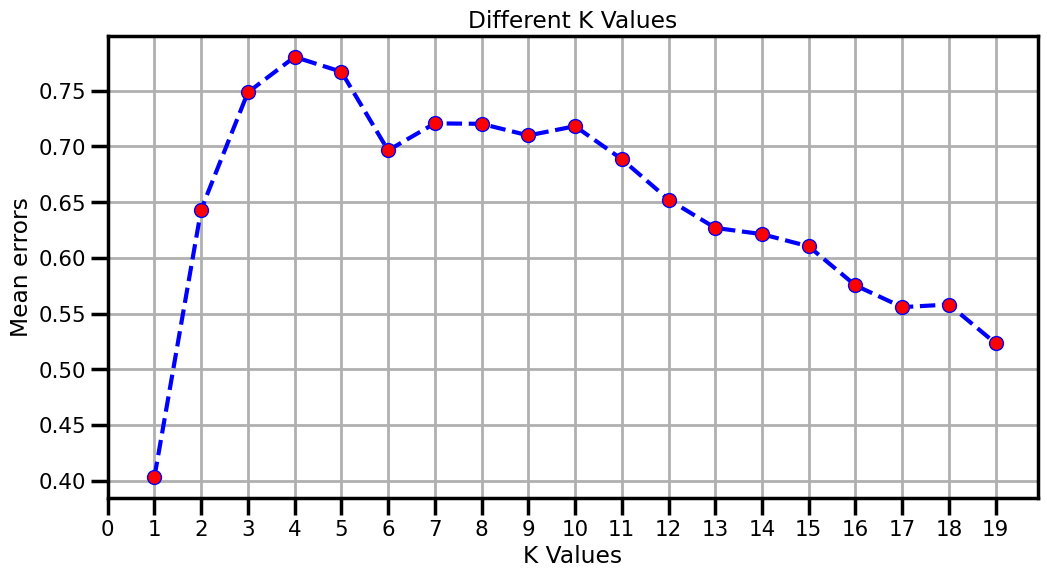

In [532]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20),acc_k,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.grid()
plt.xticks(np.arange(0,20))
# plt.yticks(np.arange(0,2,.1))
plt.title('Different K Values')
plt.xlabel('K Values')
plt.ylabel('Mean errors')

In [533]:
acc_k.index(max(acc_k))

3

4 seems a good choice for k

In [534]:
model_score=get_score(KNeighborsRegressor(n_neighbors=4))

model score on train data: 0.7390929096723284
model score on test data: 0.7803524713811273


In [535]:
kfold_score=get_kfold_score(KNeighborsRegressor(n_neighbors=4))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.78848937  0.73645675  0.3276132   0.64035799  0.66641818  0.80434437
  0.24016406 -0.3242527   0.77386606  0.7451815 ]


<IPython.core.display.Javascript object>

kfold accuracy: 0.5398638763279209


In [536]:
KNN_df = pd.DataFrame({'Algorithm':['KNN Regressor'], 'accuracy': [model_score]}, index=['7'])
results = pd.concat([results, KNN_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352


In [537]:
#Store the accuracy results for each model in a dataframe for final comparison

KNNfold_df = pd.DataFrame({'Algorithm': ['KNN Regressor k fold'], 'accuracy': kfold_score},index=['8'])
results = pd.concat([results, KNNfold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864


## Bagging Regressor 

In [538]:
from sklearn.ensemble import BaggingRegressor

In [539]:
model_score=get_score(BaggingRegressor())

model score on train data: 0.8189681807189263
model score on test data: 0.6120623396639858


In [540]:
kfold_score=get_kfold_score(BaggingRegressor())

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.76201786  0.42880631  0.46134582  0.7733652   0.81210927  0.4425259
  0.05671056 -1.86262333  0.63968501  0.76129255]


<IPython.core.display.Javascript object>

kfold accuracy: 0.3275235145340646


In [541]:
Bagging_df=pd.DataFrame({"Algorithm":"Bagging Regressor","accuracy":model_score},index=['9'])
results=pd.concat([results,Bagging_df])
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062


In [542]:
BaggingKFold_df = pd.DataFrame({'Algorithm': ['Bagging Regressor k fold'], 'accuracy': accuracy},index=['10'])
results = pd.concat([results, BaggingKFold_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


## Support Vector Regressor 

In [543]:
from sklearn.svm import SVR
model=SVR(kernel="linear")

In [544]:
model_score=get_score(model)

model score on train data: 0.5663450034155284
model score on test data: 0.6907111253743625


In [545]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.64506759  0.72066141  0.13740946  0.73322192  0.82955492  0.42656006
  0.09697204 -1.05299124  0.34033798  0.67817287]


<IPython.core.display.Javascript object>

kfold accuracy: 0.3554967026200736


In [546]:
SVR_df = pd.DataFrame({'Algorithm': ['Support Vector Regressor','Support Vector Regressor k fold'], 'accuracy':[model_score,kfold_score]},index=['11','12'])
results = pd.concat([results, SVR_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


## XGBoost Regressor 

In [547]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [548]:
xgr=XGBRegressor()

In [549]:
model_score=get_score(xgr)

model score on train data: 0.8567037301225828
model score on test data: 0.40965170700070985


In [550]:
kfold_score=get_kfold_score(xgr)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.79563148  0.52023215  0.47787096  0.75082215  0.80548089  0.50668599
  0.06484612 -1.19711367  0.70974945  0.80239548]


<IPython.core.display.Javascript object>

kfold accuracy: 0.42366010099713813


In [551]:
XGB_df = pd.DataFrame({'Algorithm': ['XGBoost Regressor','XGBoost Regressor k_fold'], 'accuracy': [model_score,kfold_score]},index=['13','14'])
results = pd.concat([results, XGB_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


## Decision Tree Regressor 

In [552]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)

DecisionTreeRegressor()

In [553]:
print('Feature Importance: \n',pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns]))

<IPython.core.display.Javascript object>

Feature Importance: 
           Importance
MOLARITY     0.72621
FLY ASH      0.27379


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

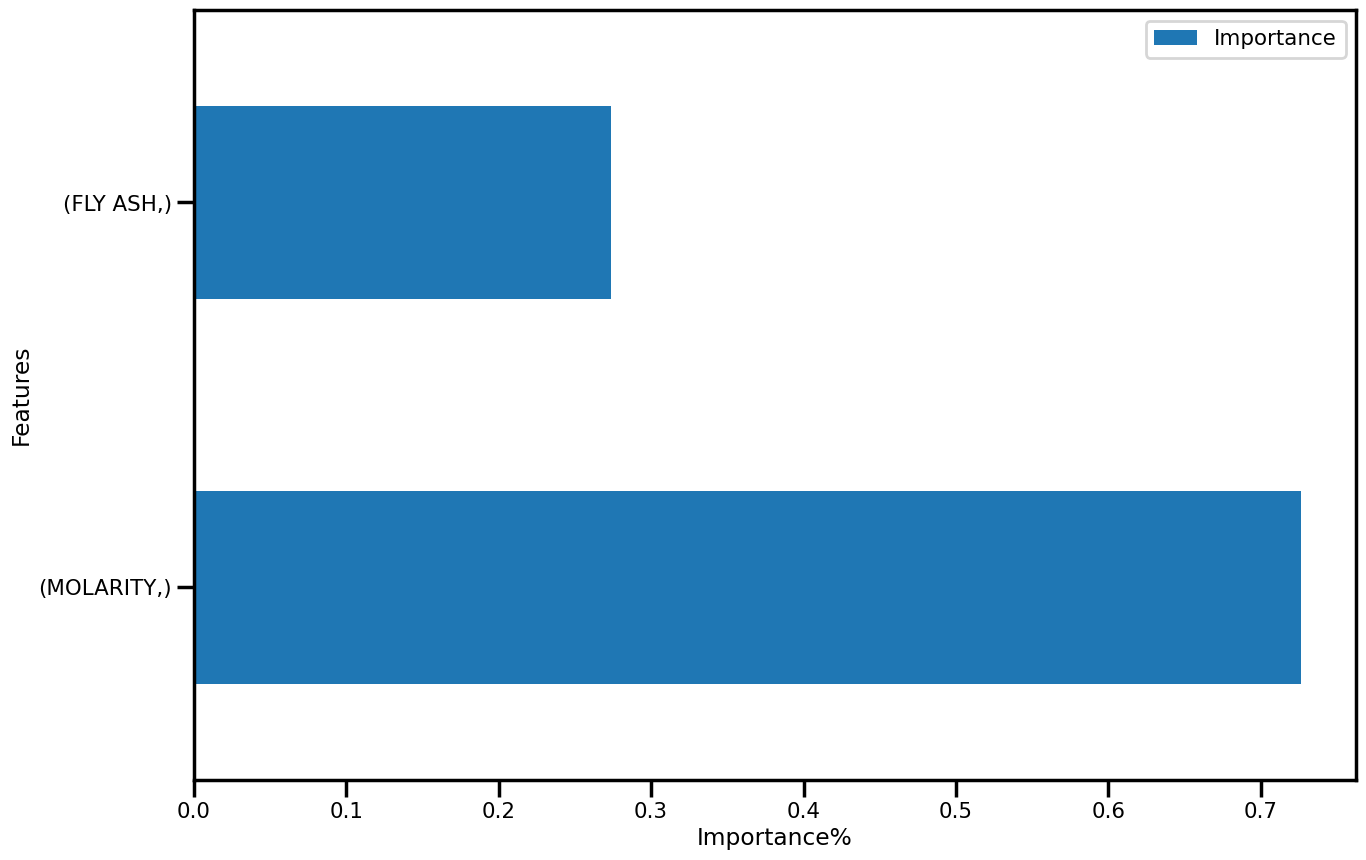

In [554]:
df_featureimp=pd.DataFrame(model.feature_importances_,columns=['Importance'],index=[X_train.columns])
df_featureimp.plot(kind="barh",figsize=(15,10))
plt.xlabel("Importance%")
plt.ylabel("Features")
plt.yticks=[X_train.columns]

Thus we can observe that <b>MOLARITY</b> is the most import feature in prediction

In [555]:
model_score=model.score(X_test,y_test)
model_score

0.40843699984907467

In [556]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.79553349  0.51959472  0.47764313  0.75074453  0.80539255  0.50636186
  0.06364067 -1.19826191  0.70950164  0.80256536]


<IPython.core.display.Javascript object>

kfold accuracy: 0.4232716028913006


In [557]:
DT_df=pd.DataFrame({'Algorithm':['Decision Tree Regressor 1','Decision Tree Regressor 1 k_fold'],'accuracy':[model_score,kfold_score]},index=['15','16'])
results=pd.concat([results,DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


# Feature Selection

In [558]:
df

,WTLOSS,MOLARITY,FLY ASH,GGBS
0,8.130000,1,80,20
1,7.020000,1,80,20
2,7.420000,1,80,20
3,8.420000,1,80,20
4,6.470000,2,80,20
...,...,...,...,...
59,5.350000,3,50,50
60,5.800000,4,50,50
61,4.840000,4,50,50
62,5.268340,4,50,50


In [559]:
df2 = df.copy() #create a copy of df in order to drop the least important features and work on only the important features

In [560]:
X1 = df2.drop(['WTLOSS','FLY ASH','GGBS'],axis=1)
y1 = df2['WTLOSS']
#Split the X1 and y1 into training and test set in 70:30 ratio
X1_train,X1_test, y1_train,y1_test = train_test_split(X1,y1, test_size=0.3,random_state = 1)

<IPython.core.display.Javascript object>

In [561]:
X1_train = X1_train.apply(zscore)
X1_test = X1_test.apply(zscore)

## Decision Tree Regressor 2

In [562]:
decNew_Model = DecisionTreeRegressor()
decNew_Model.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [563]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(decNew_Model.feature_importances_,columns=['Importance'],index=X1_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
           Importance
MOLARITY         1.0


In [564]:
model_score=decNew_Model.score(X1_train, y1_train)
model_score

0.6038037708463828

In [565]:
DT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2'], 'accuracy': model_score},index=['17'])
results = pd.concat([results, DT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


In [566]:
k = 10

kfold = KFold(n_splits=k, random_state=70,shuffle= True)
results_9 = cross_val_score(decNew_Model, X1, y1, cv=kfold)
accuracy=np.mean(abs(results_9))
accuracy

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.5959768468869865

In [567]:
DCT_df = pd.DataFrame({'Algorithm': ['Decision Tree Regressor 2 k_fold'], 'accuracy': accuracy},index=['18'])
results = pd.concat([results, DCT_df])
results = results[['Algorithm','accuracy']]
results

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


## Pruned Decision Tree Regressor 

In [568]:
dec_prun_model=DecisionTreeRegressor(max_depth=4, random_state=1,min_samples_leaf=5)

In [569]:
model_score=get_score(dec_prun_model)

model score on train data: 0.6583089528544737
model score on test data: 0.5987488345960692


In [570]:
kfold_score=get_kfold_score(dec_prun_model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.73066819  0.74080647 -0.08776837  0.76024282  0.73274117  0.25000902
 -0.35226317 -2.56123027  0.76173257  0.65780297]


<IPython.core.display.Javascript object>

kfold accuracy: 0.16327414038442184


In [571]:
dec_prun_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=5, random_state=1)

In [572]:
#printing the feature importance(that's features that are important and helping or contributing for us to make good predictions)
print('Feature importance: \n',pd.DataFrame(dec_prun_model.feature_importances_,columns=['Importance'],index=X_train.columns))

<IPython.core.display.Javascript object>

Feature importance: 
           Importance
MOLARITY    0.910909
FLY ASH     0.089091


### Plotting the Decision Tree 

In [573]:
!pip install graphviz

In [574]:
!pip install pydot

In [575]:
!pip install six

In [576]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import graphviz
import pydot

In [577]:
Xscaled2_df=Xscaled_df.drop(['WTLOSS','GGBS'],axis=1)
feature_cols = Xscaled2_df.columns

In [578]:
feature_cols

Index(['MOLARITY', 'FLY ASH'], dtype='object')

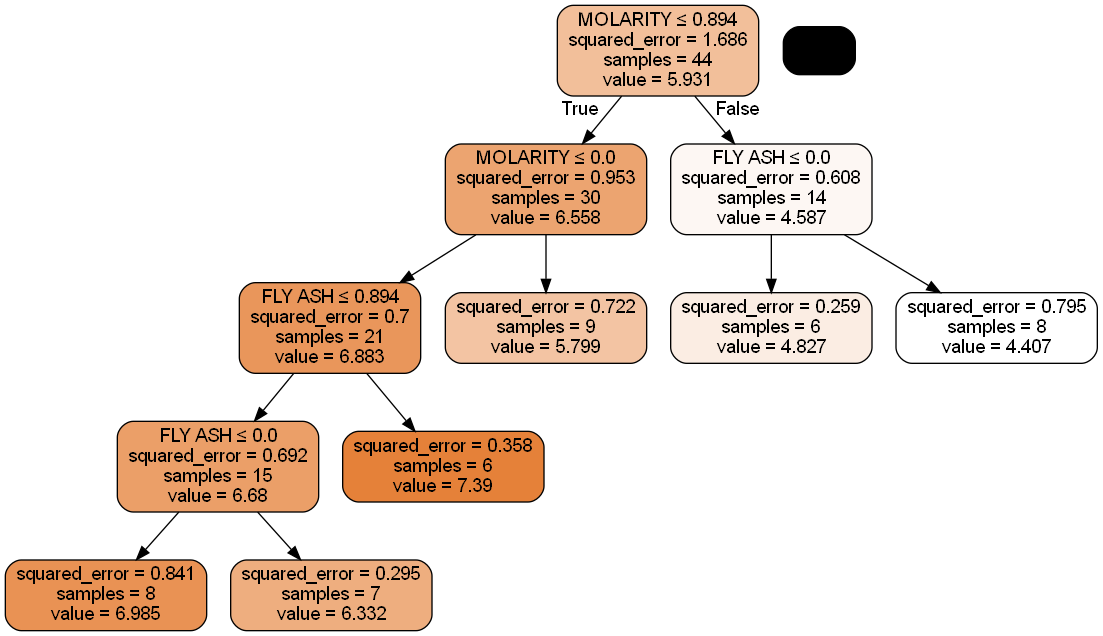

In [579]:
dot_data=StringIO()
export_graphviz(dec_prun_model,out_file=dot_data,
               filled=True,rounded=True,
               special_characters=True,
               feature_names=feature_cols,class_names=['0','1'])
(graph,)=pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_png('UCS_pruned.png')
Image(graph.create_png())

In [580]:
DecT_df = pd.DataFrame({'Algorithm': ['Pruned Decision Tree','Pruned Decision Tree k_fold'], 'accuracy': [model_score,kfold_score]},index=['19','20'])
results = pd.concat([results, DecT_df])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


<b>KNN Regressor and Pruned Decision Tree Regressor</b> are the best models for modelling %WeightLoss. We can work with either of them. 

# Regression using ANN 

## Hyperparameter Tuning

In [581]:
from keras.models import Sequential
from keras.layers import Dense

def FunctionFindBestParams(X_train, y_train, X_test, y_test):
    
    # Defining the list of hyper parameters to try
    batch_size_list=[5, 10, 15, 20]
    epoch_list  =   [5, 10, 50, 100]
    
    import pandas as pd
    SearchResultsData=pd.DataFrame(columns=['TrialNumber', 'Parameters', 'Accuracy'])
    
    # initializing the trials
    TrialNumber=0
    for batch_size_trial in batch_size_list:
        for epochs_trial in epoch_list:
            TrialNumber+=1
            # create ANN model
            model = Sequential()
            # Defining the first layer of the model
            model.add(Dense(units=128, kernel_initializer='normal', activation='relu'))
 
            # Defining the Second layer of the model
            model.add(Dense(units=64, kernel_initializer='normal', activation='relu'))
 
            # The output neuron is a single fully connected node 
            # Since we will be predicting a single number
            model.add(Dense(1, kernel_initializer='normal'))
 
            # Compiling the model
            model.compile(loss='mean_squared_error', optimizer='adam')
 
            # Fitting the ANN to the Training set
            model.fit(X_train, y_train ,batch_size = batch_size_trial, epochs = epochs_trial, verbose=0)
            y_pred=model.predict(X_test)
           
            y_pred=np.array(y_pred[:][:])
            y_test=np.reshape(y_test,(-1,1))
            err=abs(y_test-y_pred)
            err/=y_test
            MAPE=np.mean(err)*100
#             MAPE = np.mean(100 * (np.abs(y_test-y_pred)/y_test))
            
            # printing the results of the current iteration
            print(TrialNumber, 'Parameters:','batch_size:', batch_size_trial,'-', 'epochs:',epochs_trial, 'Accuracy:', 100-MAPE)
            
            SearchResultsData=pd.concat([SearchResultsData,pd.DataFrame(data=[[TrialNumber, str(batch_size_trial)+'-'+str(epochs_trial), 100-MAPE]],
                                                                    columns=['TrialNumber', 'Parameters', 'Accuracy'] )])
    return(SearchResultsData)
 
 
######################################################
# Calling the function
ResultsData=FunctionFindBestParams(X_train, y_train, X_test, y_test)

1/1 [==============================] - 0s 66ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

1 Parameters: batch_size: 5 - epochs: 5 Accuracy: 17.636574137965752
1/1 [==============================] - 0s 79ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

2 Parameters: batch_size: 5 - epochs: 10 Accuracy: 87.74984844539539
1/1 [==============================] - 0s 66ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

3 Parameters: batch_size: 5 - epochs: 50 Accuracy: 91.55343015422673
1/1 [==============================] - 0s 50ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

4 Parameters: batch_size: 5 - epochs: 100 Accuracy: 91.68864449341946
1/1 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

5 Parameters: batch_size: 10 - epochs: 5 Accuracy: 5.063886730082928
1/1 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

6 Parameters: batch_size: 10 - epochs: 10 Accuracy: 30.02255954566307
1/1 [==============================] - 0s 56ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7 Parameters: batch_size: 10 - epochs: 50 Accuracy: 91.01478353659981
1/1 [==============================] - 0s 58ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

8 Parameters: batch_size: 10 - epochs: 100 Accuracy: 91.30280439900721
1/1 [==============================] - 0s 68ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

9 Parameters: batch_size: 15 - epochs: 5 Accuracy: 2.100765474001605
1/1 [==============================] - 0s 59ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

10 Parameters: batch_size: 15 - epochs: 10 Accuracy: 9.641058723957869
1/1 [==============================] - 0s 80ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

11 Parameters: batch_size: 15 - epochs: 50 Accuracy: 88.8237208655385
1/1 [==============================] - 0s 98ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

12 Parameters: batch_size: 15 - epochs: 100 Accuracy: 90.83819212597032
1/1 [==============================] - 0s 81ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

13 Parameters: batch_size: 20 - epochs: 5 Accuracy: 2.382807064743659
1/1 [==============================] - 0s 73ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

14 Parameters: batch_size: 20 - epochs: 10 Accuracy: 5.8586951256406365
1/1 [==============================] - 0s 85ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

15 Parameters: batch_size: 20 - epochs: 50 Accuracy: 89.45569339985698
1/1 [==============================] - 0s 70ms/step


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

16 Parameters: batch_size: 20 - epochs: 100 Accuracy: 91.10240309475381


### Choosing best parameters

We can even use <b>keras tuner</b> to optimise the no. of hidden layers and learning rate

<Axes: xlabel='Parameters'>

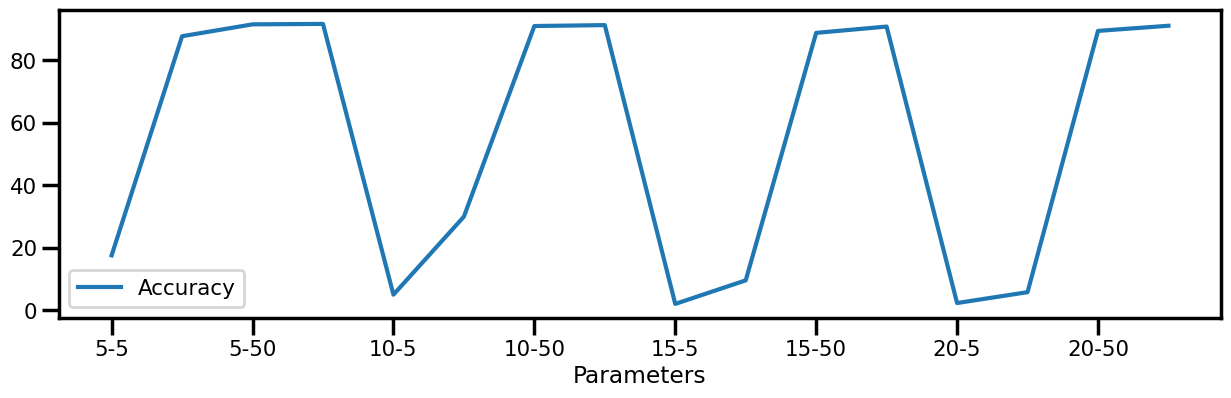

In [582]:
ResultsData.plot(x='Parameters', y='Accuracy', figsize=(15,4), kind='line')

## Regressor with optimized parameters 

In [583]:
from keras.models import Sequential
from keras.layers import Dense
model=Sequential()
model.add(Dense(units=128,kernel_initializer="normal",activation="relu"))
model.add(Dense(units=64,kernel_initializer="normal",activation="tanh"))
model.add(Dense(1,kernel_initializer="normal"))
model.compile(loss="mean_squared_error",optimizer="adam")
model.fit(X_train,y_train,batch_size=5,epochs=50,verbose=1)

Epoch 1/50
9/9 [==============================] - 1s 2ms/step - loss: 36.3176
Epoch 2/50
9/9 [==============================] - 0s 2ms/step - loss: 34.4833
Epoch 3/50
9/9 [==============================] - 0s 2ms/step - loss: 31.6332
Epoch 4/50
9/9 [==============================] - 0s 3ms/step - loss: 27.0095
Epoch 5/50
9/9 [==============================] - 0s 2ms/step - loss: 20.3909
Epoch 6/50
9/9 [==============================] - 0s 2ms/step - loss: 12.6526
Epoch 7/50
9/9 [==============================] - 0s 990us/step - loss: 6.3421
Epoch 8/50
9/9 [==============================] - 0s 2ms/step - loss: 2.4752
Epoch 9/50
9/9 [==============================] - 0s 2ms/step - loss: 1.1892
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 0.9357
Epoch 11/50
9/9 [==============================] - 0s 2ms/step - loss: 0.8570
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 0.7317
Epoch 13/50
9/9 [==============================] - 0s 2ms/step - 

In [584]:
y_pred_ANN_manual=model.predict(X_test)

1/1 [==============================] - 0s 57ms/step


In [585]:
acc_ANN=metrics.r2_score(y_test,y_pred)
acc_ANN

<IPython.core.display.Javascript object>

0.6477498339527654

In [586]:
metrics.mean_squared_error(y_test, y_pred)

<IPython.core.display.Javascript object>

0.542417697613284

In [587]:
ANN_re = pd.DataFrame({'Algorithm': ['ANN Manually Tuned'], 'accuracy': acc_ANN},index=['21'])
results = pd.concat([results, ANN_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


# Regression with Sklearn ANN or MLP(Multi-Layer Perceptron) 

In [588]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split

In [589]:
model = MLPRegressor(hidden_layer_sizes=(128,64), activation='relu', solver='adam', max_iter=10000)
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(128, 64), max_iter=10000)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

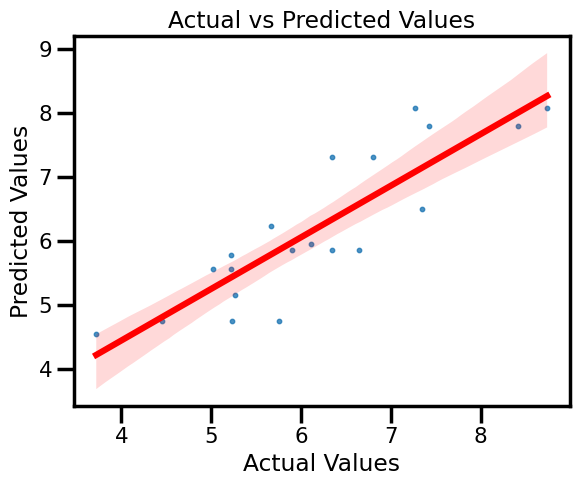

In [590]:
# Predict values for testing set
y_pred_MLP = model.predict(X_test)

# Create regression plot with actual and predicted values
sns.regplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

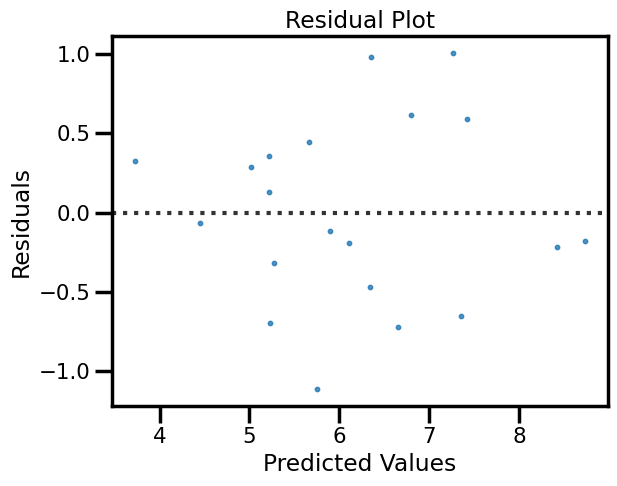

In [591]:
# Create residual plot with actual and predicted values
sns.residplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [592]:
model_score=model.score(X_test,y_test)
model_score

0.7562762917703952

In [593]:
kfold_score=get_kfold_score(model)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[ 0.66735538 -0.58215966 -2.99162543  0.82549101 -0.44333095  0.3290859
 -0.05300971 -4.73272983  0.37076809 -1.8913889 ]


<IPython.core.display.Javascript object>

kfold accuracy: -0.8501544099383466


In [594]:
gradient_re = pd.DataFrame({'Algorithm': ['ANN:Scikit-Learn MLP','ANN:Scikit-Learn MLP k_fold'], 'accuracy': [model_score,kfold_score]},index=['22','23'])
results = pd.concat([results, gradient_re])
display(results)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Algorithm,accuracy
1,Random Forest,0.628163
2,Random Forest Regressor k_fold,0.641086
3,Gradient Boost Regressor,0.647750
4,Gradient Boost Regressor k fold,0.656307
5,Ada Boost Regressor,0.639812
6,Ada Boost Regressor k fold,0.511638
7,KNN Regressor,0.780352
8,KNN Regressor k fold,0.539864
9,Bagging Regressor,0.612062
10,Bagging Regressor k fold,0.656307


Thus we see that the <b>ANN Manually Trained, MLP(ANN), KNN Regressor</b> is also performing good on the test data but yields poor kfold accuracy

# Plotting

In [595]:
df

,WTLOSS,MOLARITY,FLY ASH,GGBS
0,8.130000,1,80,20
1,7.020000,1,80,20
2,7.420000,1,80,20
3,8.420000,1,80,20
4,6.470000,2,80,20
...,...,...,...,...
59,5.350000,3,50,50
60,5.800000,4,50,50
61,4.840000,4,50,50
62,5.268340,4,50,50


## Actual vs Prediction Plots

In [596]:
import matplotlib.pyplot as plt
plt.rcdefaults()

SMALL_SIZE = 22
MEDIUM_SIZE = 20
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

## Type 1 Plots 

<Figure size 640x480 with 0 Axes>

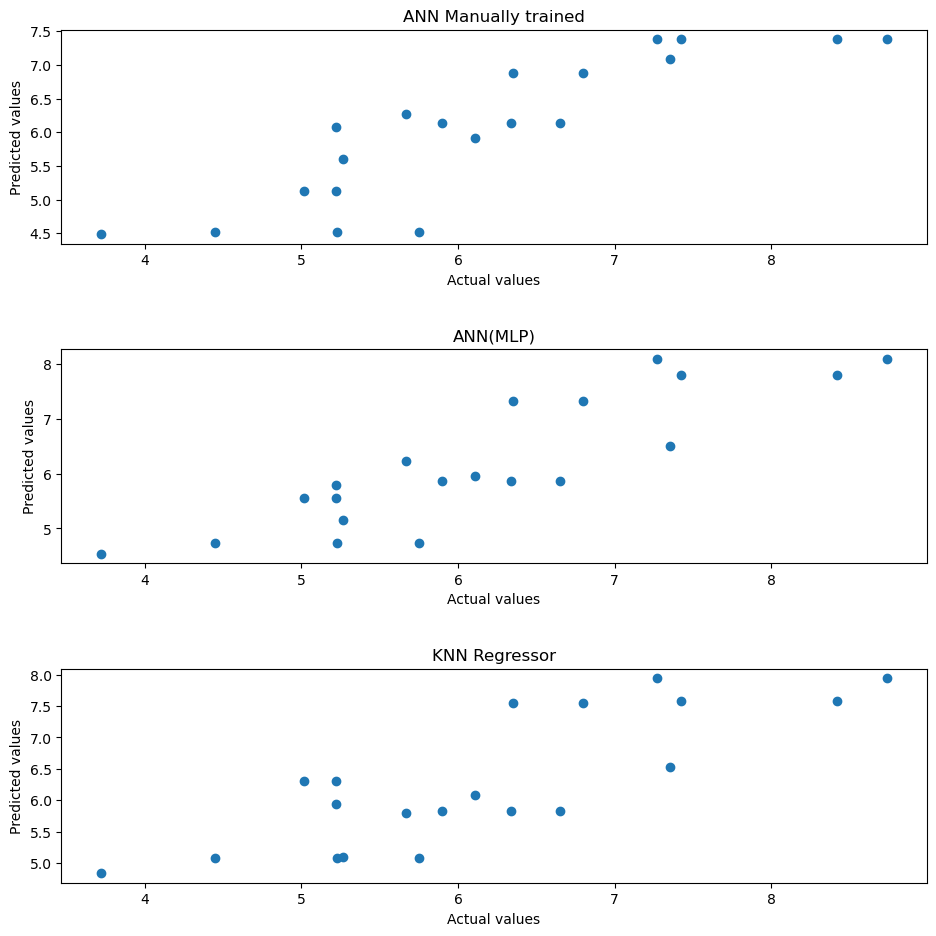

In [605]:
plt.clf()
fig,ax=plt.subplots(3,1,figsize=(10,10))

#Manual ANN
ax[0].scatter(y_test,y_pred_ANN_manual)
ax[0].set_title("ANN Manually trained")
ax[0].set_xlabel("Actual values")
ax[0].set_ylabel("Predicted values")

#MLP Sklearn
ax[1].scatter(y_test,y_pred_MLP)
ax[1].set_title("ANN(MLP)")
ax[1].set_xlabel("Actual values")
ax[1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[2].scatter(y_test,y_pred)
ax[2].set_title("KNN Regressor")
ax[2].set_xlabel("Actual values")
ax[2].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Plot type 2 

<Figure size 640x480 with 0 Axes>

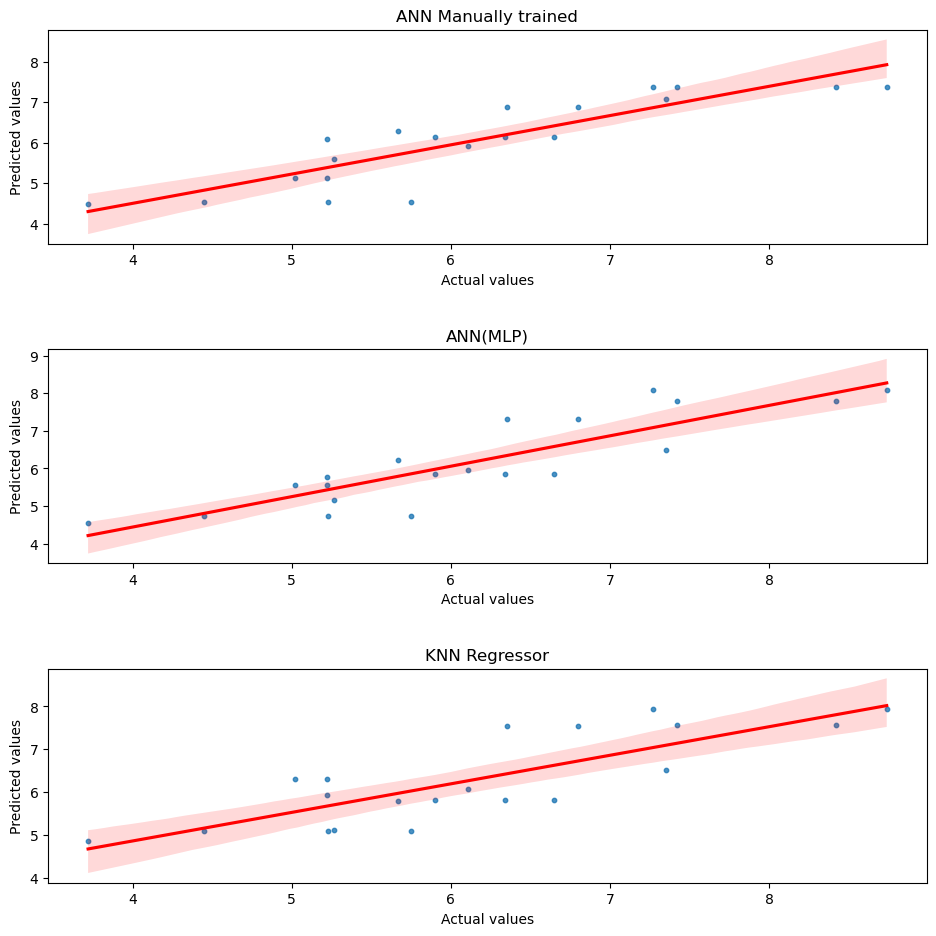

In [606]:
plt.clf()
fig,ax=plt.subplots(3,1,figsize=(10,10))

#Manual ANN
sns.regplot(x=y_test, y=y_pred_ANN_manual, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0])
ax[0].set_title("ANN Manually trained")
ax[0].set_xlabel("Actual values")
ax[0].set_ylabel("Predicted values")

#MLP Sklearn
sns.regplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1])
ax[1].set_title("ANN(MLP)")
ax[1].set_xlabel("Actual values")
ax[1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2])
ax[2].set_title("KNN Regressor")
ax[2].set_xlabel("Actual values")
ax[2].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 3 Plots 

<Figure size 640x480 with 0 Axes>

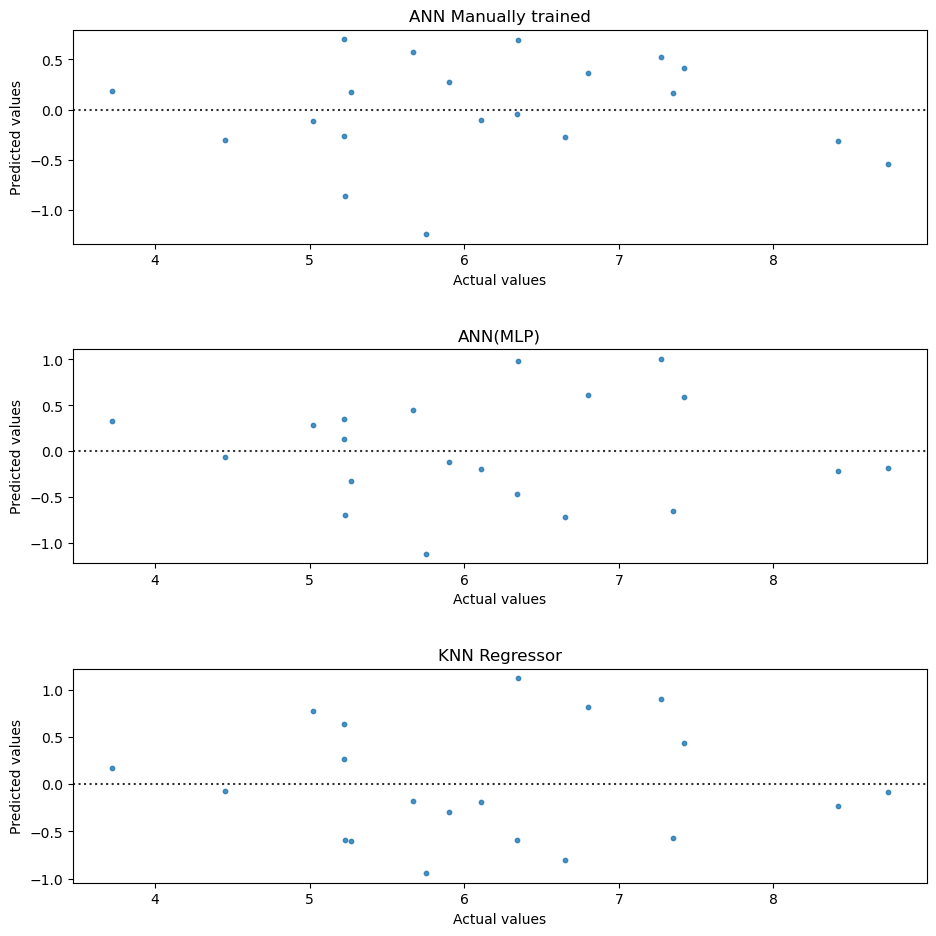

In [607]:
plt.clf()
fig,ax=plt.subplots(3,1,figsize=(10,10))

#Manual ANN
sns.residplot(x=y_test, y=y_pred_ANN_manual, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[0])
ax[0].set_title("ANN Manually trained")
ax[0].set_xlabel("Actual values")
ax[0].set_ylabel("Predicted values")

#MLP Sklearn
sns.residplot(x=y_test, y=y_pred_MLP, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[1])
ax[1].set_title("ANN(MLP)")
ax[1].set_xlabel("Actual values")
ax[1].set_ylabel("Predicted values")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
sns.residplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'},ax=ax[2])
ax[2].set_title("KNN Regressor")
ax[2].set_xlabel("Actual values")
ax[2].set_ylabel("Predicted values")

fig.tight_layout(pad=3)

## Type 4 plot 

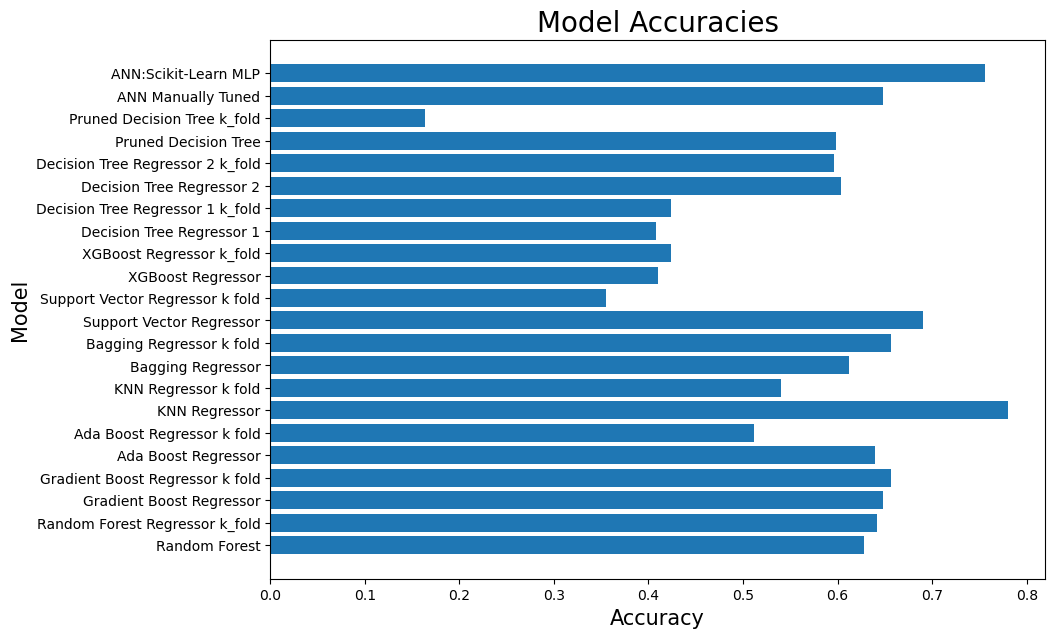

In [610]:
plt.rcdefaults()
models=list(results["Algorithm"][:-1])
scores=list(results["accuracy"][:-1])
plt.figure(figsize=(10,7))
plt.barh(models[:],scores[:])
plt.ylabel("Model",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
plt.title("Model Accuracies",fontsize=20)
plt.xticklabels=results["Algorithm"]

## Type 5 Plot

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

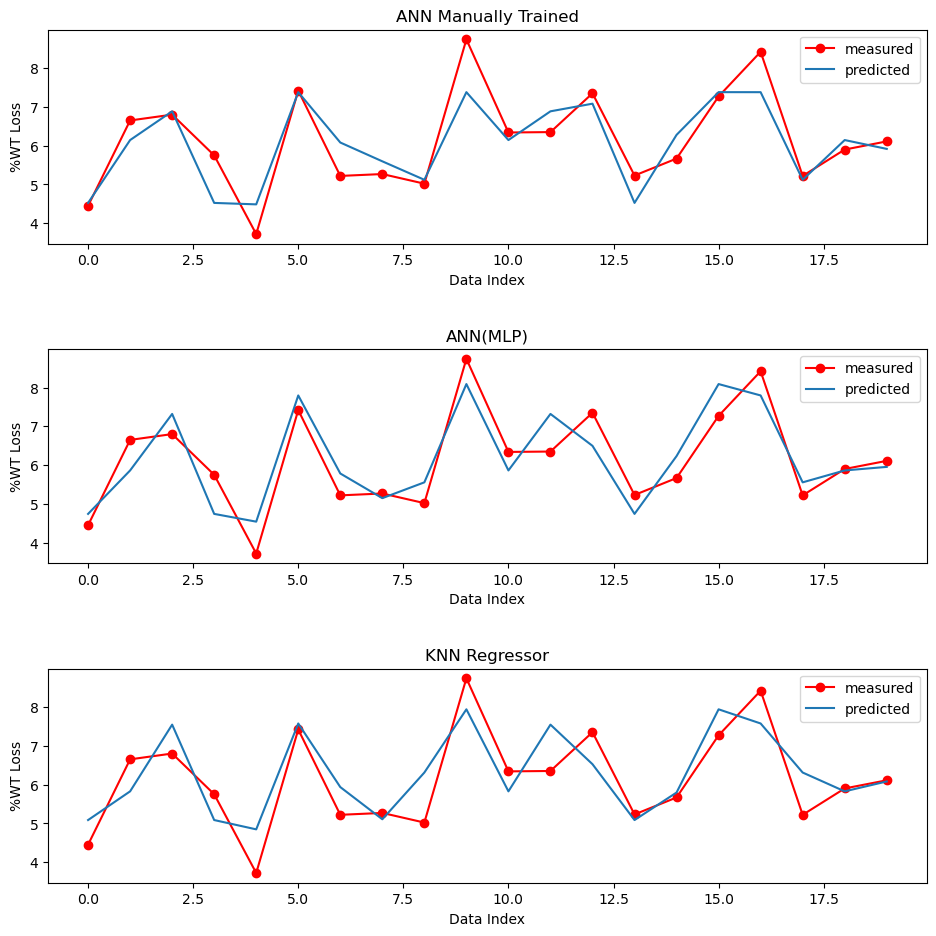

In [614]:
arr=np.arange(20)

plt.clf()
import seaborn as sns
fig,ax=plt.subplots(3,1,figsize=(10,10))

#Manual ANN
ax[0].set_title("ANN Manually Trained")
ax[0].plot(arr,y_test,"r-o",label="measured")
ax[0].plot(arr,y_pred_ANN_manual,label="predicted")
ax[0].legend()
ax[0].set_xlabel("Data Index")
ax[0].set_ylabel("%WT Loss")

#MLP Sklearn
ax[1].set_title("ANN(MLP)")
ax[1].plot(arr,y_test,"r-o",label="measured")
ax[1].plot(arr,y_pred_MLP,label="predicted")
ax[1].legend()
ax[1].set_xlabel("Data Index")
ax[1].set_ylabel("%WT Loss")

model3=KNeighborsRegressor(n_neighbors=2)
model3.fit(X_train,y_train)
y_pred=model3.predict(X_test)
ax[2].set_title("KNN Regressor")
ax[2].plot(arr,y_test,"r-o",label="measured")
ax[2].plot(arr,y_pred,label="predicted")
ax[2].legend()
ax[2].set_xlabel("Data Index")
ax[2].set_ylabel("%WT Loss")

fig.tight_layout(pad=3)